# Ingeligencja obliczeniowa

**Projekt 5: Przestrzenie Ciągłe**   
Olgierd Piofczyk, Kaja Dzielnicka

---

## Środowisko: Pendulum-v1

W ramach projektu zastosowaliśmy środowisko `Pendulum-v1` z biblioteki `gymnasium`. Jest to klasyczny problemem sterowania, w którym zadaniem agenta jest balansowanie wahadła w pionie, startując z dowolnej pozycji. Agent otrzymuje negatywne nagrody za odchylenia od pionu oraz za dużą prędkość kątową.

## Algorytm: SAC

SAC jest algorytmem wzmacniającego uczenia, który łączy metody aktora-krytyka z maksymalizacją entropii. Celem jest nie tylko maksymalizacja nagrody, ale także eksploracja różnych działań.

## Implementacja

### Instalacja środowiska

In [ ]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import SAC
import matplotlib.pyplot as plt
import os

### Zdefiniowanie folderu do zapisywania wyników

In [ ]:
logs_dir = 'logs'
learning_algorithm = 'SAC'

if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

if not os.path.exists(learning_algorithm):
    os.makedirs(learning_algorithm)

### Metoda uczenia

In [ ]:
def train(env, name, max_iters=10, timesteps=50000, hyperparams={}):

    gamma_str = hyperparams.get("gamma") or "idk"
    log = f"{logs_dir}/2/SAC_{gamma_str}"
    model = SAC('MlpPolicy', env, verbose=1, tensorboard_log=log, **hyperparams)

    for iters in range(max_iters):
        model.learn(total_timesteps=timesteps, reset_num_timesteps=False)
        model.save(f'{learning_algorithm}/{name}_{timesteps*iters}')

### Metoda testowania

In [ ]:
def test(env, path_to_model):
    model = SAC.load(path_to_model)

    obs = env.reset()[0]
    done = False
    while True:
        action, _states = model.predict(obs)
        obs, _, done, _, _ = env.step(action)

        if done:
            break

### Definicja środowiska i trening agenta

In [ ]:
env = gym.make('Pendulum-v1', render_mode=None)
env_test = gym.make('Pendulum-v1', render_mode='human')

train(env, 1, 500)

test(env_test, 'SAC/{}0')

![wykres](wykres1.png)

Wykres przedstawia średnie wynagrodzenie na odcinku (epizodzie) podczas treningu agenta. W miarę postępu treningu, który trwał 19,200 kroków, agent stopniowo poprawiał swoje wyniki, co widać na krzywej uczącej się. Początkowo średnie wynagrodzenie wynosiło około -1200, co oznaczało niską wydajność, jednak z czasem wzrosło do około -327, wskazując na znaczną poprawę. Krzywa sugeruje, że agent szybko się uczył na początku, a następnie tempo uczenia się spowolniło, co jest typowe dla procesów uczenia się. Całkowity czas treningu wynosił około 5,612 minut. Mimo poprawy, agent nie osiągnął jeszcze optymalnej wydajności, co sugeruje potrzebę dalszego treningu.

---

## Eksperymenty z różnymi wartościami hiperparametrów

Przeprwoadziliśmy eksperymenty z różnymi wartościami hiperparametrów, aby sprawdzić, jak wpływają one na wyniki uczenia. Wybraliśmy trzy hiperparametry: `learning_rate`, `batch_size` oraz `gamma`. Dla każdego z nich przetestowaliśmy trzy różne wartości:

In [ ]:
hyperparameters = [
    {'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99},
    {'learning_rate': 0.0001, 'batch_size': 128, 'gamma': 0.95},
    {'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9},
]

Następnie przeprowadziliśmy trening agenta dla każdej kombinacji hiperparametrów i zapisaliśmy wyniki. Każdy zestaw został uruchomiony 10 razy na 50000 kroków czasowych. Poniżej przedstawiamy wykresy średniej nagrody w zależności od liczby epizodów dla każdej kombinacji hiperparametrów.

In [ ]:

train(env, "batch256", 10, 50000, hyperparameters[0])
train(env, "batch128", 10, 50000, hyperparameters[1])
train(env, "batch512", 10, 50000, hyperparameters[2])

`{'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99}`
 
 czas: 192 min

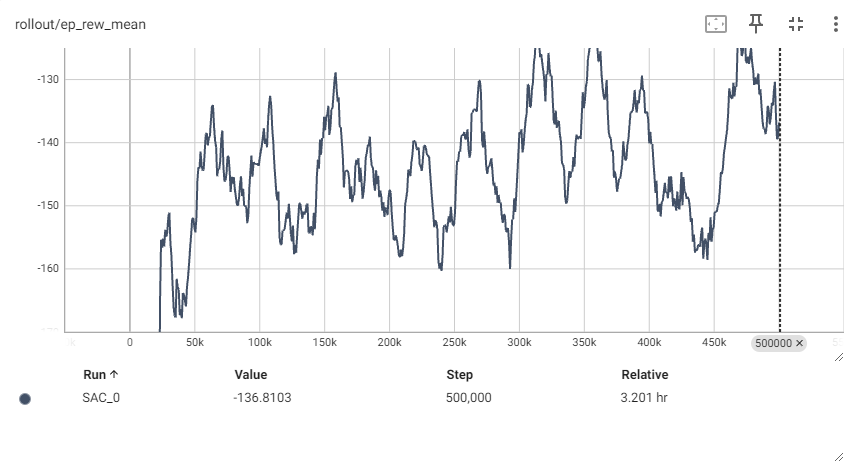

Średnie wynagrodzenie wynosi -136.8103. Krzywa wynagrodzenia jest bardzo zmienna, ale wykazuje ogólny trend wzrostowy, z wieloma wyraźnymi szczytami i dolinami. To sugeruje, że agent uczy się, ale proces jest niestabilny.

---

`{'learning_rate': 0.0001, 'batch_size': 128, 'gamma': 0.95}`

czas: 147 min

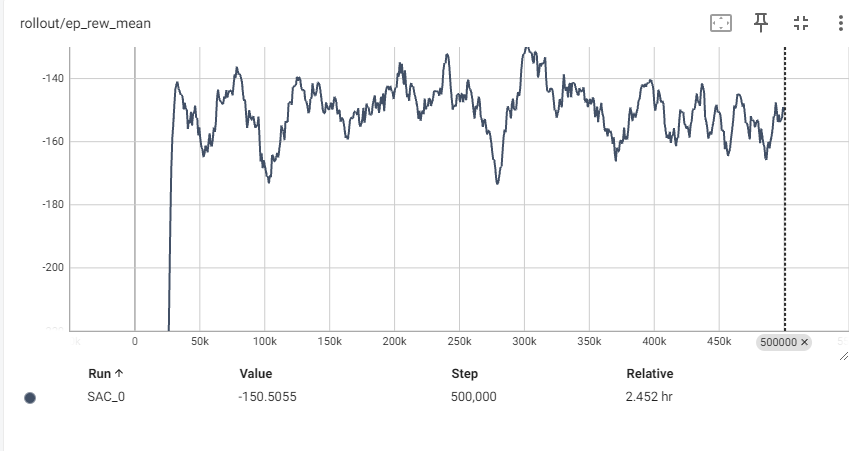

Średnie wynagrodzenie wynosi -150.5055, co jest gorszym wynikiem w porównaniu do poprzedniego wykresu. Krzywa wynagrodzenia jest bardziej płaska i mniej zmienna, co sugeruje stabilniejszy, ale mniej efektywny proces uczenia się.

---

`{'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9}`

czas: 207 min

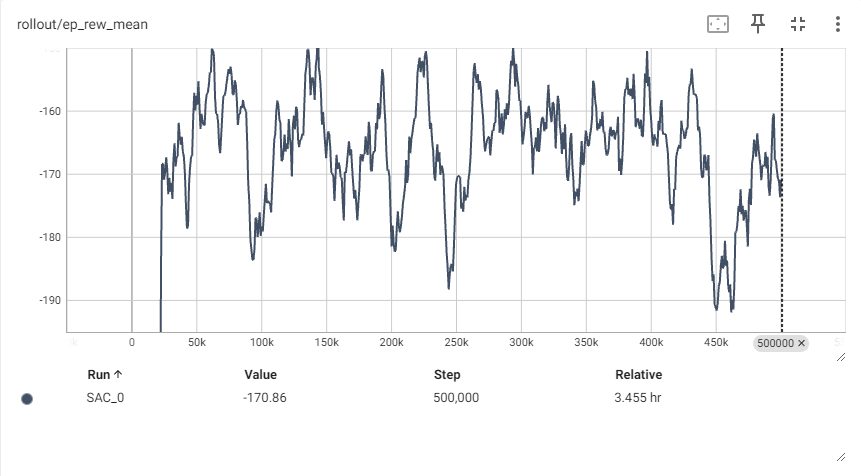

Na tym wykresie średnie wynagrodzenie wynosi -170.86, co jest najgorszym wynikiem spośród wszystkich trzech wykresów. Krzywa wynagrodzenia jest bardzo niestabilna, z wieloma dużymi wahaniami. To sugeruje, że agent ma trudności z ustabilizowaniem procesu uczenia się.

---

Analizując trzy wykresy, można stwierdzić, że najlepsze wyniki uzyskano przy hiperparametrach {'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99}, gdzie średnie wynagrodzenie wyniosło -136.8103. Te parametry zapewniły agentowi relatywnie stabilny i efektywny proces uczenia się, pomimo pewnych wahań. Najgorsze wyniki uzyskano przy hiperparametrach {'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9}, z wynagrodzeniem -170.86, co wskazuje na dużą niestabilność w procesie uczenia się. Wyniki te sugerują, że zbyt wysokie wartości `learning_rate` i `batch_size` mogą prowadzić do niestabilności, podczas gdy umiarkowane wartości tych parametrów sprzyjają lepszej wydajności.